 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv("whale_returns.csv")
whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()

#validate nulls have been dropped.

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = pd.read_csv("algo_returns.csv")
algo_returns = pd.read_csv("algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
# validate nulls have been dropped
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv('sp500_history.csv')
sp500 = pd.read_csv('sp500_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types

def convert_currency(val):
    
    new_val = val.replace('.','').replace('$','')
    return float(new_val)

sp500['Close'] = sp500['Close'].apply(convert_currency)

sp500.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns = sp500['Close'].pct_change()
sp500_returns = pd.DataFrame(sp500_returns)
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
sp500_returns.dropna().copy()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [40]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns= ['SP500']
sp500_returns.dropna()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
combined_df = combined_df.rename(columns={'Close': 'SP500'})
combined_df.sort_index(inplace=True)
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

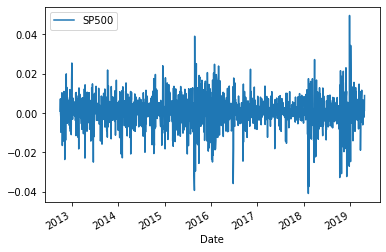

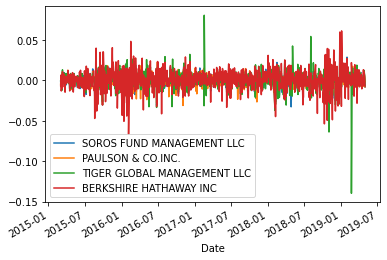

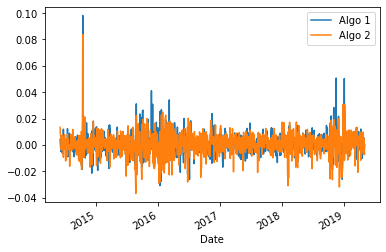

In [16]:
# Plot daily returns of all portfolioss

sp500_returns.plot()

whale_returns.plot()

algo_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

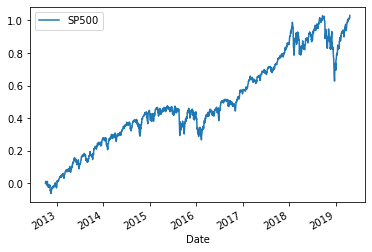

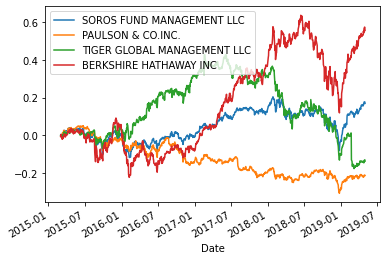

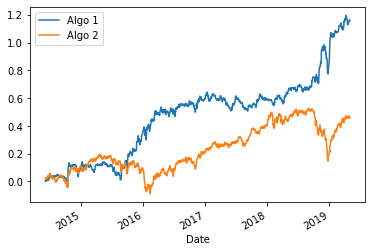

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns_sp500 = ( 1+ sp500_returns).cumprod() -1
cumulative_returns_sp500.head()
#plot cumulative returns
cumulative_returns_sp500.plot()

# Calculate cumulative returns of all portfolios
cumulative_returns_whales = ( 1+ whale_returns).cumprod() -1
cumulative_returns_whales.head()
#plot cumulative returns
cumulative_returns_whales.plot()


# Calculate cumulative returns of all portfolios
cumulative_returns_algo = ( 1+ algo_returns).cumprod() -1
cumulative_returns_algo.head()
#plot cumulative returns
cumulative_returns_algo.plot()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

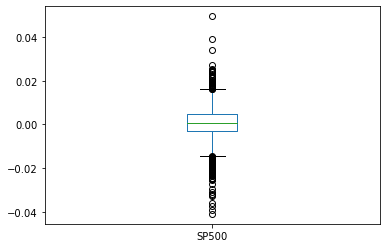

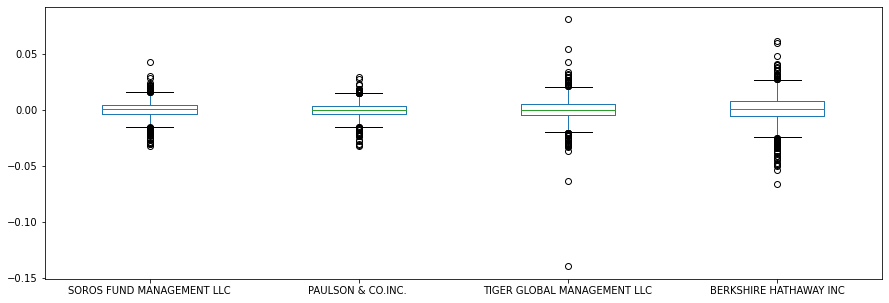

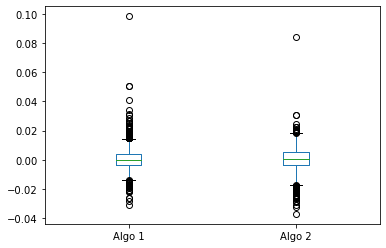

In [18]:
# Box plot to visually show risk
sp500_returns.plot.box()

whale_returns.plot.box(figsize=(15,5))

algo_returns.plot.box()

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios

sp500_daily_std = sp500.std()
whales_daily_std = whale_returns.std()
algo_daily_std = algo_returns.std()

daily_std_combined_df = combined_df.std()
daily_std_combined_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:ylabel='Frequency'>

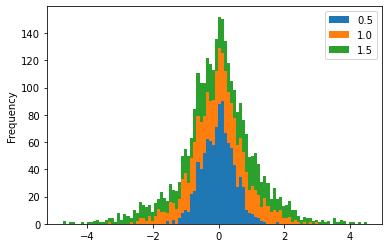

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_returns.std()
sp500_daily_std
# Determine which portfolios are riskier than the S&P 500

sp500_daily_std = np.random.normal(scale=0.5, size=1000)
whales_daily_std = np.random.normal(scale=1.0, size=1000)
algo_daily_std = np.random.normal(scale=1.5, size=1000)

combined_std = pd.DataFrame({
    "0.5": sp500_daily_std,
    "1.0": whales_daily_std,
    "1.5": algo_daily_std
})

combined_std.plot.hist(stacked=True, bins=100)

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_combined_df * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

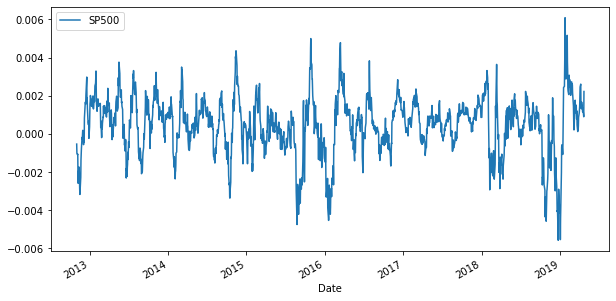

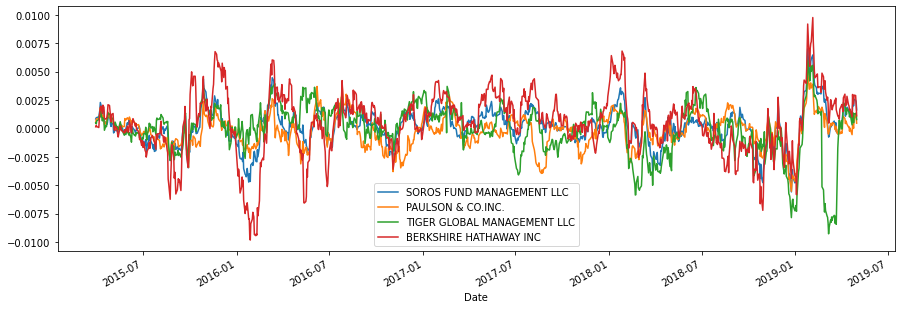

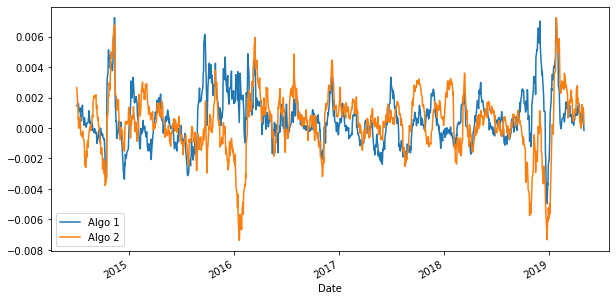

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_sp500 = sp500_returns.rolling(window=21).mean().dropna()
    
rolling_std_whales = whale_returns.rolling(window=21).mean().dropna()

rolling_std_algo = algo_returns.rolling(window=21).mean().dropna()

# Plot the rolling standard deviation
rolling_std_sp500.plot(figsize=(10,5))


rolling_std_whales.plot(figsize=(15,5))

rolling_std_algo.plot(figsize=(10,5))

### Calculate and plot the correlation

<AxesSubplot:>

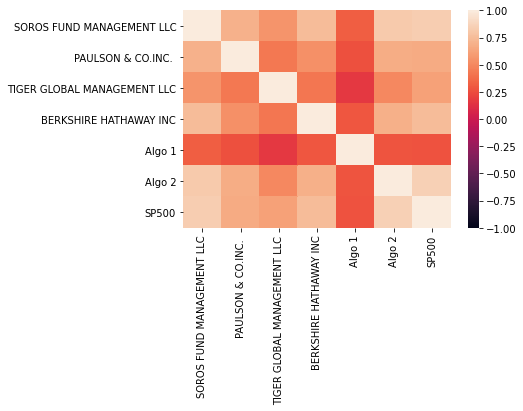

In [23]:
# Calculate the correlation
sp500_correlation = combined_df.corr()

# Display de correlation matrix
sns.heatmap(sp500_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Text(0.5, 1.0, 'Berkshire Hathaway rolling Beta')

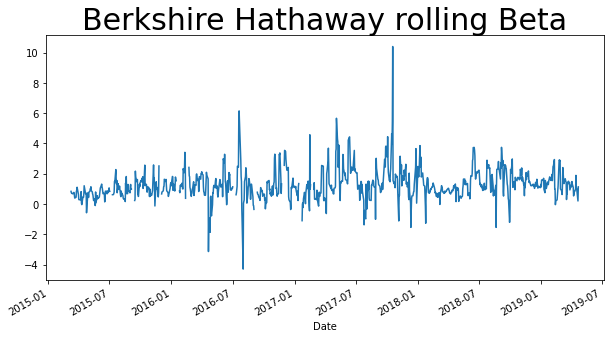

In [24]:
# Calculate covariance of a single portfolio
covariance_berkshire = whale_returns['BERKSHIRE HATHAWAY INC'].cov(sp500_returns['SP500'])
rolling_covariance =  whale_returns['BERKSHIRE HATHAWAY INC'].rolling(window=5).cov(sp500_returns['SP500'])

# Calculate variance of S&P 500
sp500_variance = sp500_returns['SP500'].var()
rolling_variance = sp500_returns['SP500'].rolling(window=5).var()
# Computing beta

berkshire_beta = covariance_berkshire / sp500_variance
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend

rolling_beta.plot(figsize=(10,5))
font1={'size': 30}

plt.title('Berkshire Hathaway rolling Beta', fontdict = font1)



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

Text(0.5, 0, 'Date')

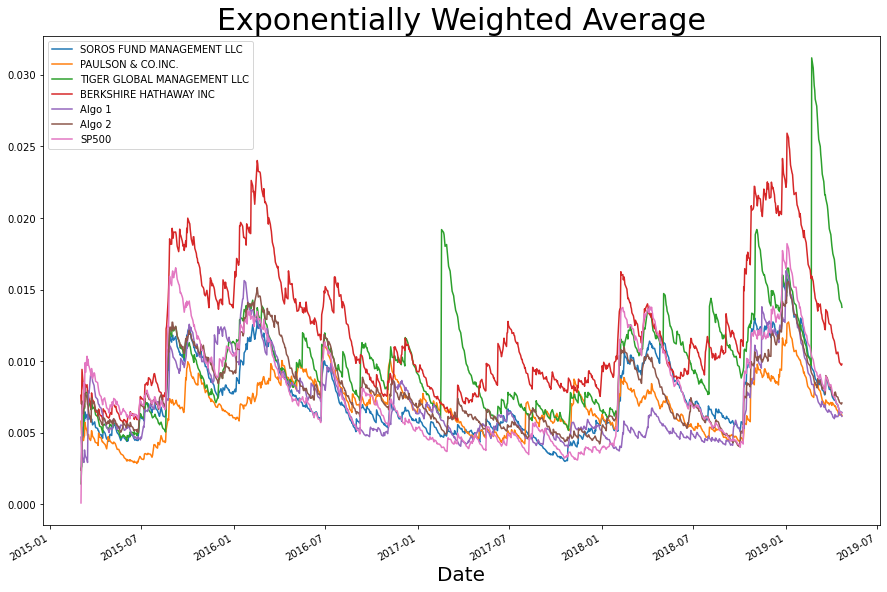

In [25]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(21).std().plot(figsize=(15,10))

font1={'size': 30}
font2={'size':20}
plt.title('Exponentially Weighted Average', fontdict = font1)
plt.xlabel('Date', fontdict= font2)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sp500_sharpe = (sp500_returns['SP500'].mean() * 252) / (sp500_returns['SP500'].std() * np.sqrt(252))

whales_sharpe = (whale_returns.mean() * 252) / (whale_returns.std() * np.sqrt(252))

algo_sharpe = (algo_returns.mean() * 252) / (algo_returns.std() * np.sqrt(252))

print(sp500_sharpe)
print(whales_sharpe)
print(algo_sharpe)


0.9060284422745816
SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64
Algo 1    1.300176
Algo 2    0.639258
dtype: float64


Text(0.5, 1.0, 'Annualized Sharpe Ratios')

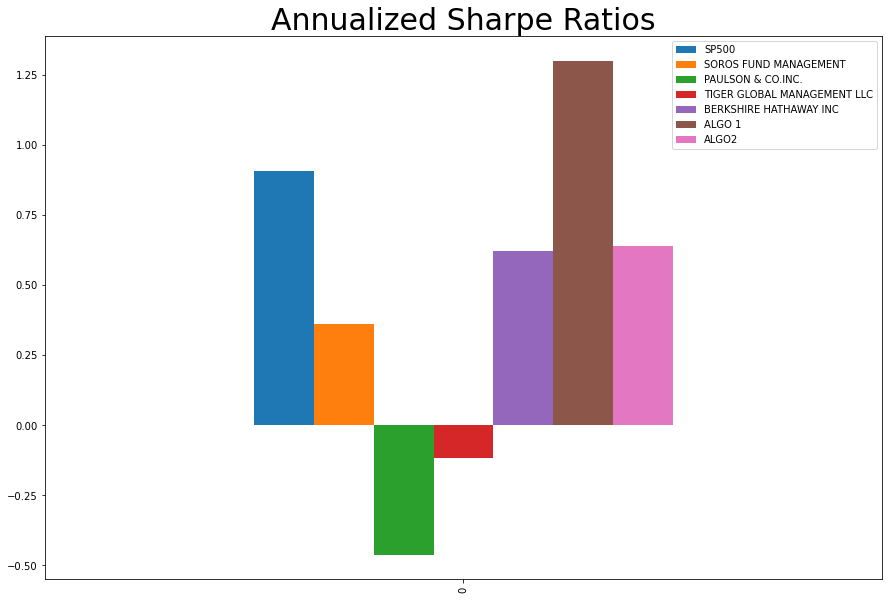

In [27]:
# Visualize the sharpe ratios as a bar plot

data = {'SP500': [sp500_sharpe], 'SOROS FUND MANAGEMENT': [0.361568],
        'PAULSON & CO.INC.': [-0.462131], 'TIGER GLOBAL MANAGEMENT LLC': [-0.118257],
       'BERKSHIRE HATHAWAY INC': [0.619628],'ALGO 1' :[1.300176], 'ALGO2': [0.639258]}

sharpe_ratios = pd.DataFrame(data)
sharpe_ratios.plot(figsize=(15,10), kind='bar')

font1={'size': 30}
plt.title('Annualized Sharpe Ratios', fontdict = font1)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algorithm 1 outperformed the market and whales portfolios by a substantial ammount.
it boasts an 116% return from 2015 to 2019, in comparison to the S&P at 60% and Berkshire Hathaway at 56%.

The annualized sharpe ratio is also much better then both the S&P and Whale portfolios, meaning that the there is less risk for the excess return.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
tsla_df = pd.read_csv('TSLA.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-24,52.770000,53.063999,51.599998,51.731998,51.731998,53637500
2019-04-25,51.000000,51.799999,49.214001,49.526001,49.526001,109247000
2019-04-26,49.299999,49.335999,46.226002,47.028000,47.028000,111803500
2019-04-29,47.172001,48.796001,46.433998,48.293999,48.293999,83572500
2019-04-30,48.411999,48.841999,47.400002,47.737999,47.737999,47323000


In [29]:
# Reading data from 2nd stock
mstr_df = pd.read_csv('MSTR.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
mstr_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-24,149.570007,150.809998,149.119995,149.539993,149.539993,70900
2019-04-25,149.240005,150.660004,147.009995,148.000000,148.000000,71800
2019-04-26,148.240005,149.850006,147.529999,149.419998,149.419998,100600
2019-04-29,149.729996,151.080002,148.410004,149.229996,149.229996,101500
2019-04-30,149.919998,151.979996,147.050003,149.699997,149.699997,134700


In [30]:
# reading data from 4th stock
pypl_df = pd.read_csv('PYPL.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
pypl_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-24,107.110001,108.389999,106.419998,107.220001,107.220001,9553100
2019-04-25,108.519997,110.919998,108.519997,110.220001,110.220001,10959400
2019-04-26,109.720001,110.570000,107.879997,110.559998,110.559998,7683200
2019-04-29,110.699997,113.000000,110.440002,112.440002,112.440002,6989300
2019-04-30,112.440002,113.220001,111.199997,112.769997,112.769997,6489400


In [31]:
# Combine all stocks in a single DataFrame

tsla_close = tsla_df["Close"]
mstr_close = mstr_df["Close"]
pypl_close = pypl_df['Close']


closing_prices = pd.concat([tsla_close, mstr_close, pypl_close],axis='columns', join='inner')
closing_prices.columns = ['TSLA', 'MSTR', 'PYPL']
closing_prices

,TSLA,MSTR,PYPL
Date,,,
2015-08-06,49.226002,213.039993,38.849998
2015-08-07,48.501999,215.610001,39.130001
2015-08-10,48.228001,218.850006,39.049999
2015-08-11,47.473999,215.410004,38.849998
2015-08-12,47.633999,216.979996,38.189999
...,...,...,...
2019-04-24,51.731998,149.539993,107.220001
2019-04-25,49.526001,148.000000,110.220001
2019-04-26,47.028000,149.419998,110.559998


In [39]:
# Reset Date index
closing_prices.sort_index(ascending=False,inplace=True)
closing_prices

,TSLA,MSTR,PYPL
Date,,,
2019-04-30,47.737999,149.699997,112.769997
2019-04-29,48.293999,149.229996,112.440002
2019-04-26,47.028000,149.419998,110.559998
2019-04-25,49.526001,148.000000,110.220001
2019-04-24,51.731998,149.539993,107.220001
...,...,...,...
2015-08-12,47.633999,216.979996,38.189999
2015-08-11,47.473999,215.410004,38.849998
2015-08-10,48.228001,218.850006,39.049999


In [33]:
# Reorganize portfolio data by having a column per symbol


In [34]:
# Calculate daily returns
daily_returns = closing_prices.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
daily_returns
# Display sample data


,TSLA,MSTR,PYPL
Date,,,
2015-08-07,-0.014708,0.012064,0.007207
2015-08-10,-0.005649,0.015027,-0.002045
2015-08-11,-0.015634,-0.015719,-0.005122
2015-08-12,0.003370,0.007288,-0.016988
2015-08-13,0.018222,0.007973,-0.014925
...,...,...,...
2019-04-24,-0.019856,0.002548,0.002993
2019-04-25,-0.042643,-0.010298,0.027980
2019-04-26,-0.050438,0.009595,0.003085


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
mm_portfolio = daily_returns.dot(weights)

# Display sample data

mm_portfolio = pd.DataFrame(mm_portfolio)  
mm_portfolio.columns=['MM portfolio']
mm_portfolio.tail()

,MM portfolio
Date,
2019-04-24,-0.004772
2019-04-25,-0.008320
2019-04-26,-0.012586
2019-04-29,0.014218
2019-04-30,-0.001809


In [98]:
cumulative_returns_mm = (1 + mm_portfolio).cumprod()
cumulative_returns_mm.tail()

,MM portfolio
Date,
2019-04-24,1.427184
2019-04-25,1.415310
2019-04-26,1.397496
2019-04-29,1.417365
2019-04-30,1.414801


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# Join your returns DataFrame to the original returns DataFrame

all_portfolios = pd.concat([combined_df, mm_portfolio], axis='columns', join='inner')
all_portfolios.sort_index(inplace=True)
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,MM portfolio
Date,,,,,,,,
2015-08-07,-0.005018,0.002053,-0.001415,-0.007747,-0.000374,0.013425,-0.002875,0.001521
2015-08-10,0.014226,0.010811,0.008946,0.005263,0.007062,0.010774,0.012808,0.002444
2015-08-11,0.000000,0.000000,0.000000,0.000000,-0.011918,-0.003127,-0.009557,-0.012158
2015-08-12,0.000000,0.000000,0.000000,0.000000,0.003026,0.002437,0.000950,-0.002110
2015-08-13,0.000000,0.000000,0.000000,0.000000,-0.003447,-0.004732,-0.001275,0.003757
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.012441
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.007357
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.005616


In [100]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,MM portfolio
Date,,,,,,,,
2015-08-07,-0.005018,0.002053,-0.001415,-0.007747,-0.000374,0.013425,-0.002875,0.001521
2015-08-10,0.014226,0.010811,0.008946,0.005263,0.007062,0.010774,0.012808,0.002444
2015-08-11,0.000000,0.000000,0.000000,0.000000,-0.011918,-0.003127,-0.009557,-0.012158
2015-08-12,0.000000,0.000000,0.000000,0.000000,0.003026,0.002437,0.000950,-0.002110
2015-08-13,0.000000,0.000000,0.000000,0.000000,-0.003447,-0.004732,-0.001275,0.003757
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.012441
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.007357
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.005616


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [101]:
# Calculate the annualized `std`
mm_daily_std = mm_portfolio.std()
mm_annualized_std = mm_daily_std * np.sqrt(252)
mm_annualized_std


MM portfolio    0.254887
dtype: float64

### Calculate and plot rolling `std` with 21-day window

Text(0.5, 0, 'Date')

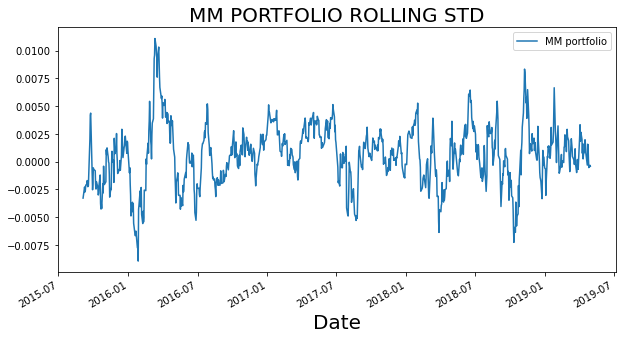

In [102]:
# Calculate rolling standard deviation
mm_rolling_std = mm_portfolio.rolling(window=21).mean().dropna()
# Plot rolling standard deviation
mm_rolling_std.plot(figsize=(10,5))
font1={'size': 20}
plt.title('MM PORTFOLIO ROLLING STD', fontdict = font1)
plt.xlabel('Date', fontdict = font2)

### Calculate and plot the correlation

<AxesSubplot:>

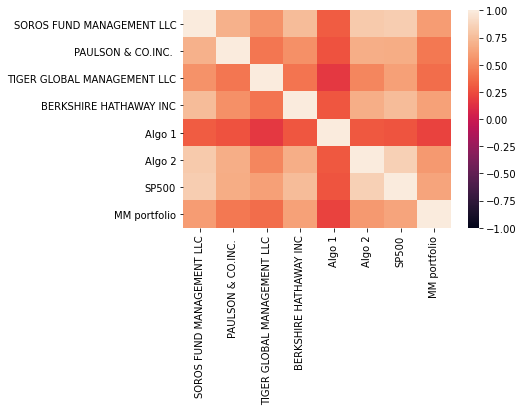

In [103]:
# Calculate and plot the correlation
mm_portfolio_corr = all_portfolios.corr()
sns.heatmap(mm_portfolio_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Text(0.5, 0, 'Date')

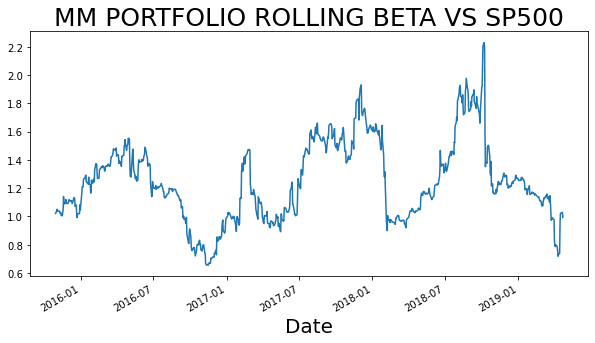

In [104]:
# Calculate and plot Beta
mm_covariance = mm_portfolio['MM portfolio'].cov(sp500_returns['SP500'])
rolling_covariance =  mm_portfolio['MM portfolio'].rolling(window=60).cov(sp500_returns['SP500'])

# Calculate variance of S&P 500
sp500_variance = sp500_returns['SP500'].var()
rolling_variance = sp500_returns['SP500'].rolling(window=60).var()

# Computing beta
mm_beta = mm_covariance / sp500_variance
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend

rolling_beta.plot(figsize=(10,5))
font1={'size': 25}

plt.title('MM PORTFOLIO ROLLING BETA VS SP500', fontdict = font1)
plt.xlabel('Date', fontdict =  font2)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [105]:
# Calculate Annualzied Sharpe Ratios
sp500_sharpe = (sp500_returns['SP500'].mean() * 252) / (sp500_returns['SP500'].std() * np.sqrt(252))

whales_sharpe = (whale_returns.mean() * 252) / (whale_returns.std() * np.sqrt(252))

algo_sharpe = (algo_returns.mean() * 252) / (algo_returns.std() * np.sqrt(252))

mm_sharpe = (mm_portfolio.mean() * 252) / (mm_portfolio.std() * np.sqrt(252))

print(sp500_sharpe)
print(whales_sharpe)
print(algo_sharpe)
print(mm_sharpe)

0.9060284422745816
SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64
Algo 1    1.300176
Algo 2    0.639258
dtype: float64
MM portfolio    0.493354
dtype: float64


Text(0.5, 1.0, 'Annualized Sharpe Ratios')

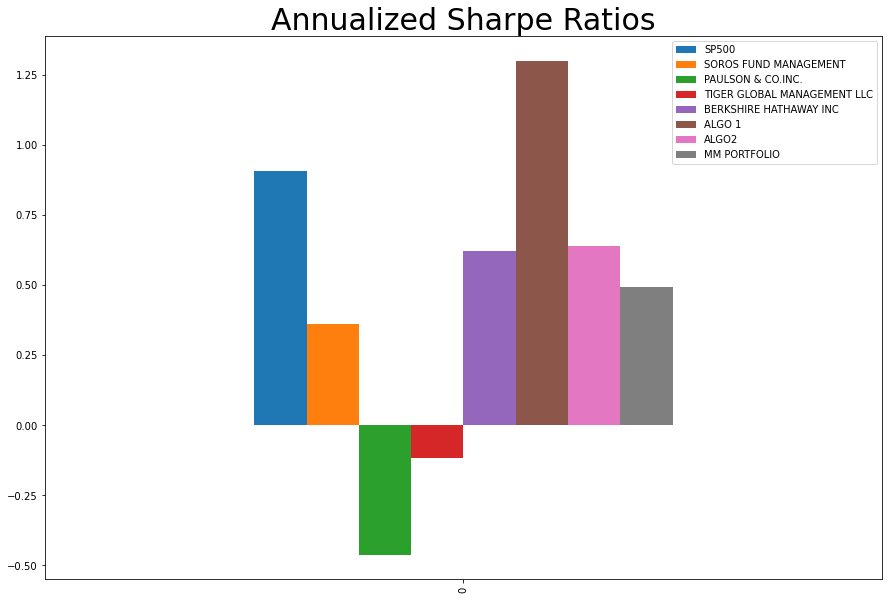

In [106]:
# Visualize the sharpe ratios as a bar plot
data = {'SP500': [sp500_sharpe], 'SOROS FUND MANAGEMENT': [0.361568],
        'PAULSON & CO.INC.': [-0.462131], 'TIGER GLOBAL MANAGEMENT LLC': [-0.118257],
       'BERKSHIRE HATHAWAY INC': [0.619628],'ALGO 1' :[1.300176], 'ALGO2': [0.639258],
       'MM PORTFOLIO': [0.493354]}

sharpe_ratios = pd.DataFrame(data)
sharpe_ratios.plot(figsize=(15,10), kind='bar')

font1={'size': 30}
plt.title('Annualized Sharpe Ratios', fontdict = font1)

<AxesSubplot:xlabel='Date'>

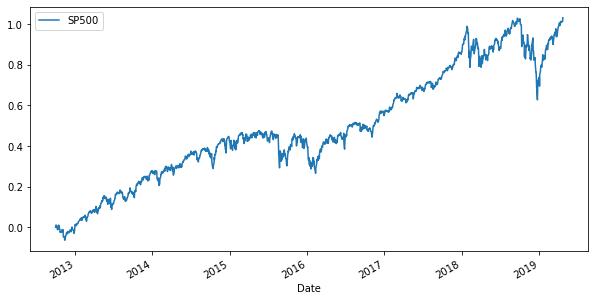

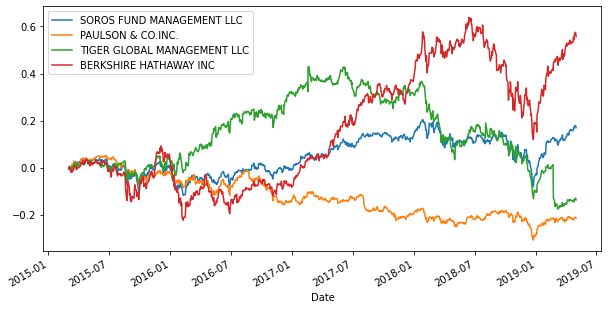

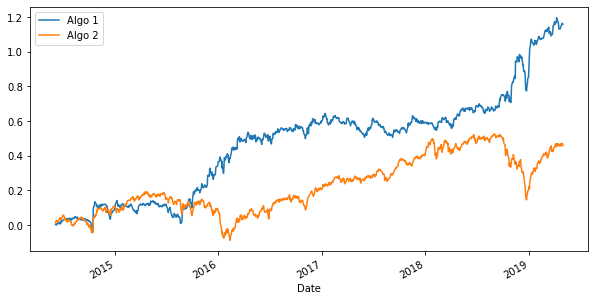

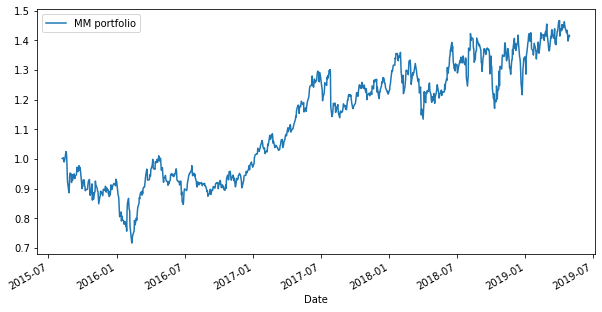

In [107]:

cumulative_returns_sp500.plot(figsize=(10,5))
                              
cumulative_returns_whales.plot(figsize=(10,5))
                               
cumulative_returns_algo.plot(figsize=(10,5))
                                                       
cumulative_returns_mm.plot(figsize=(10,5))

### How does your portfolio do?

Write your answer here!

My portfolio has only just out performed the S&P 500, and underperformed the algorithm 1
My portfolio is more volatile then the S&P, with a lower sharpe ratio,
showing higher risk for less reward. Although in comparison, still done well compared to the other portfolios.